<a id='top'></a>

# CSCI 3022: Intro to Data Science - Spring 2021 Practicum 1
***

This practicum is due on Canvas by **11:59 PM on Friday March 19*. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  


Note: There are a number of images in this problem.  If you can't get them to display properly, they are hosted [here](https://drive.google.com/drive/folders/1M4kBMd23roiDVnfbYQmPmzsR1bPZAxzX?usp=sharing).  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
2. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
3. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be a bit less helpful than we typically are with homework. For example, we will not check answers, significantly debug your code, and so on.  But please don't feel like you're totally alone on this: feel free to ask questions or ask for help, and we will decide how best to provide that assistance.
4. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
5. You may **NOT** post to message boards or other online resources asking for help.
6. You may **NOT** copy-paste solutions *from anywhere*.
7. You may **NOT** collaborate with classmates or anyone else.
8. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. (NB: you should use public posts for the epidemiology "warmup" prompts).
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. The practicum is designed to be completed using only the packages in the first given code cell.
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Bottom](#bot)

---

In [1]:
from scipy import stats
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

## [40 points] Problem 1: Simulated Forest Cover

In Boulder, Colorado people *love* trees.  So do we in CSCI3022!  So we're going to play around with a function that can be used to simulate, describe, and model tree cover.

Recall that a **Poisson** distribution is meant to count the number of events per unit time.  It turns out, the Poisson function is able to count over more versatile spaces than just time.  It can also track points over space, area, or more abstract regions.  This means that a Poisson process is a powerful way to create descriptions of *random points*.  In our prior class exercises using random points (estimating $\pi$ in nb04, stochastic integration in HW4) we simulated points *uniformly* in space and generated conclusions accordingly.  For something like tree cover, locations of trees are **not** independent and identically distributed: some areas are much denser than others!  This holds for many other processes describing random points: locations of defects in a manufacturing materials, locations of stars in the night sky, distribution of raisins in Zach's bag of granola, etc. 


To simulate from a **Poisson process**, we first determine the intensity $\Lambda$ (capital $\lambda$) at which events are occuring.  This rate can be in count-per-time, count-per-area, etc.  Since we're going to simulate tree cover, $\Lambda$ will be measured in $\frac{trees}{area}$.  Suppose our "area" is measured in acres.

### To simulate from a Poisson point process with intensity/rate $\Lambda$:

- determine the size $|A|$ of the area $A$ you wish to populate with points (trees)
- simulate $X$, a Poisson random variable with rate $\lambda = \Lambda |A|$.  This represents a count of the number of trees in area $A$.
- simulate $X$ independent and identically distributed continuous uniform random variables inside the area $A$ (these are random locations/points as we've used previously; in 2-D each will contain both a random-x coordinate *and* a random-y coordinate)
- Implementation note: If the boundary of a region $A$ is determined by a function, you can ensure that the points are continuous uniform *within* that region by simulating uniform points in a box or rectangle *covering* $A$ and discarding any points that aren't inside the boundaries of $A$, replacing with new random draws until you've reached $X$ total.
- ... and that's it!  But now we can glue together regions of varying intensities $\Lambda$ to represent different biomes, even down to "trees along the irrigation ditch" varying in intensity from "trees in the green belt" or "trees in that ugly housing complex."



** Part A **: Getting started

First, simulate two sets of points from the unit square $[0,1] \times [0,1]$.
- set one should be from a Poisson point process with intensity 150.  You should *expect* around how many trees?
- set two should be from a Poisson point process with intensity 75.  You should *expect* around how many trees?

Plot the two sets in a figure side-by-side (one row, two columns) to verify that your code is working.  Make the points green, since they're trees.

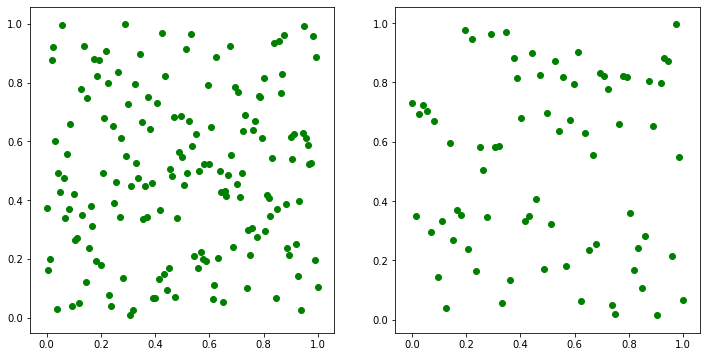

In [2]:
size_1 = stats.poisson.rvs(150) 
size_2 = stats.poisson.rvs(75) 

set_1 = stats.uniform.rvs(0,1,size=size_1)
set_1_x = np.linspace(0,1,size_1)

set_2 = stats.uniform.rvs(0,1,size=size_2)
set_2_x = np.linspace(0,1,size_2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6)) 
ax[0].scatter(set_1_x,set_1,c='green')
ax[1].scatter(set_2_x,set_2,c='green')

** Part B **: Distance-between-trees

Take the set of points from the intensity $150$ figure in part $A$ and compute the minimum distance between *any* two points in the data set (hint: likely a loop or double-loop).  Use the standard Euclidean/Pythagorean distance, where for points $(x_1, y_1)$ and $(x_2, y_2)$ the distance between them is $$d=\sqrt{(x_1-x_2)^2+(y_1-y_2)^2}$$

Print that distance.

In [3]:
def find_min_distance(points_x,points):
    min_d = 1
    count = 0
    for i in range(len(points),0,-1):
        for j in range(0,len(points)-i):
            d = ((points_x[i-1]-points_x[j])**2+(points[i-1]-points[j])**2)**0.5
            if(d < min_d and d != 0.0):
                min_d = d
                count += 1
    return min_d

print(find_min_distance(set_1_x,set_1))

0.006353127691288551


** Part C **: Distance-between-trees, fixed

It turns out our intensity values of 150-200 trees per acre (an acre is $208.71 \times 208.71$ feet) is pretty reasonable for a mature woodland.  So our original intensity values were *per acre*.  If you take your minimum linear-acre-distance and multiply it by 208.71, it should be now be feet between trees.  The result of this is that it is quite likely that some of our trees will be awkwardly close together.  Let's fix that!

Take the data set from $$\Lambda=150$$ and **thin** it by *removing* one (either) of the two points from the pair of closest points you found in part **B**.  Repeat until all your trees are at least 1.5 feet apart.

Print how many trees were removed, and create another scatter plot of the resulting locations.

Number of trees removed: 18


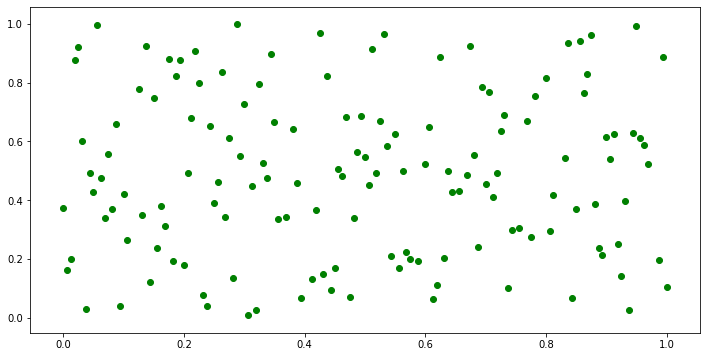

In [4]:
def clean_up_points(points_x,points):
    count = 0
    delete_idx = []
    for i in range(len(points),0,-1):
        counter = 0
        for j in range(0,len(points)):
            d = ((points_x[i-1]-points_x[j])**2+(points[i-1]-points[j])**2)**0.5
            if(d <= 0.015 and d > 0.0):
                counter += 1
        if(counter >= 1):
            delete_idx.append(i)
            count += 1
    points_clean = np.delete(points,delete_idx)
    points_x_clean = np.delete(points_x,delete_idx)
    #min_v = find_min_distance(points_x_clean,points_clean)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6)) 
    plt.scatter(points_x_clean,points_clean,c='green')
    return count

print("Number of trees removed:",clean_up_points(set_1_x,set_1))

** Part D **: Make a pretty picture!  If our goal is to describe actual terrain, we have to divide our region into areas of different intensities.  Your task here is to make a picture of a region with at least three different distinct subregions.  State clearly what $\Lambda$ is in each region, then simulate Poisson processes and populate each region with trees.  You don't have to thin the regions as in part **C**, but you can if you wish.

Your region should satisy the following properties:
- You must have at least 3 sub-regions with non-zero $\Lambda$.  $\Lambda$ should vary by enough that we observe a visible difference between regions.
- At least one region sub-division boundary should *not* be a straight vertical or horizontal line.  Use at least one sloped line or non-linear boundary.
- Hint: It is recommended that you can easily compute the *areas* of subregions of your plot, since you'll need them for the rate of that region's Poisson distribution $\lambda=A \Lambda$.

You will receive an extra 2 points if you *create your own region*, but if you do not wish to construct you own you may create simulations to fill in the plot below with trees.

78


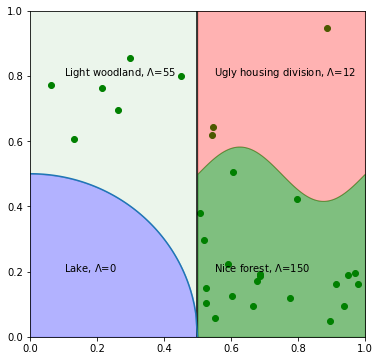

In [7]:
#Zach's picture, but without trees yet!  Add them or make your own and populate it.
def delete_points_lower(points,line):
    delete_idx = []
    for i in range(0,len(points)):
        if(points[i] <= line[i]):
            delete_idx.append(i)
    points_clean = np.delete(points,delete_idx)
    return points_clean

def delete_points_upper(points,line):
    delete_idx = []
    for i in range(0,len(points)):
        if(points[i] > line[i]):
            delete_idx.append(i)
    points_clean = np.delete(points,delete_idx)
    return points_clean


#region 1: treeless pond; #region 2: forest above lake; given by same function
pond= lambda x: np.sqrt(1/4-x**2)

#region 3: low density; #region 4: high density
houses= lambda x: 1/2+np.sin(x*np.pi*4)/12

size_light_woodland = stats.poisson.rvs(((np.pi*(0.5)**2)/4)*55) #area of light woodland is a waurter of a circle with radius 0.5
size_ugly_housing_division = stats.poisson.rvs(0.5*12) #area of ugly housing division is 0.5
size_nice_forest = stats.poisson.rvs(0.5*150) #area of nice forest is 0.5
print(size_nice_forest)

fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlim(0,1)
ax.set_ylim(0,1)

xgrd=np.linspace(0,1/2,100)
plt.vlines(.5, ymin=0, ymax=1)
plt.plot(xgrd, pond(xgrd)) #plot lake
plt.text(.1,.2, 'Lake, $\Lambda$=0') #label pond
ax.fill_between(xgrd, 0, pond(xgrd), color='blue', alpha=.3) # fill lake

plt.text(.1,.8, 'Light woodland, $\Lambda$=55')
set_light_woodland = stats.uniform.rvs(0,1,size=size_light_woodland)
set_light_woodland_new = delete_points_lower(set_light_woodland,pond(xgrd))
set_light_woodland_x = stats.uniform.rvs(0,1/2,size=len(set_light_woodland_new))
ax.scatter(set_light_woodland_x,set_light_woodland_new,c='green')
ax.fill_between(xgrd, 1, pond(xgrd), color='green', alpha=.08) # fill woodland

xgrd2=np.linspace(1/2,1,100)
plt.text(.55,.8, 'Ugly housing division, $\Lambda$=12')
set_ugly_housing_division = stats.uniform.rvs(0,1,size=size_ugly_housing_division) 
set_ugly_housing_division_new = delete_points_lower(set_ugly_housing_division,houses(xgrd2))
set_ugly_housing_division_x = stats.uniform.rvs(1/2,1,size=len(set_ugly_housing_division_new))
ax.scatter(set_ugly_housing_division_x,set_ugly_housing_division_new,c='green')
ax.fill_between(xgrd2, 1, houses(xgrd2), color='red', alpha=.3) # fill right side housing area

plt.text(.55,.2, 'Nice forest, $\Lambda$=150')
set_nice_forest = stats.uniform.rvs(0,1,size=size_nice_forest)
set_nice_forest_new = delete_points_upper(set_nice_forest,houses(xgrd2))
set_nice_forest_x = stats.uniform.rvs(1/2,1,size=len(set_nice_forest_new))
ax.scatter(set_nice_forest_x,set_nice_forest_new,c='green')
ax.fill_between(xgrd2, 0, houses(xgrd2), color='green', alpha=.5); # fill right side woodland

** Part E **: Print out the areas of each of your regions in part **D**, their intensities, and their *expected* numbers of trees.  How does this compare with the exact numbers of trees generated by your simulations?

In [8]:
print("Light woodland area:",((np.pi*(0.5)**2)/4))
print("Light woodland intensity:",55)
print("Light woodland expected number of trees:",size_light_woodland,'\n')

print("Ugly housing division area:",0.5)
print("Ugly housing division intensity:",12)
print("Ugly housing division expected number of trees:",size_ugly_housing_division,'\n')

print("Nice forest division area:",0.5)
print("Nice forest housing division intensity:",150)
print("Nice forest housing division expected number of trees:",size_nice_forest)

Light woodland area: 0.19634954084936207
Light woodland intensity: 55
Light woodland expected number of trees: 14 

Ugly housing division area: 0.5
Ugly housing division intensity: 12
Ugly housing division expected number of trees: 5 

Nice forest division area: 0.5
Nice forest housing division intensity: 150
Nice forest housing division expected number of trees: 76


<br>

---
[Back to top](#top)
<a id='p2'></a>

## [60 points] Problem 2: An Intro to Computational Epidemiology

### The Model

In this problem we introduce and begin to explore some of the baseline tools of computational epidemiology: the SIR and SI models.  

These models exist on graphs, where vertices or nodes represent people, agents, or surfaces that might carry a communicable disease.  Edges connecting nodes represent nodes that are in close contact with one another, and at risk of exchanging the disease.  


We will implement a variant of the SIR model.  In this model, each vertex has one of three possible states:
 - **I** for Infected, and at risk of passing the disease to neighboring susceptible vertices.
 - **S** for Susceptible, and at risk of becoming infected by its neighbors
 - **R** for removed, and no longer at risk of contracting or spreading the infection.

The model evolves *iteratively*, where for each discrete time step (one unit of `time`) the following two calculations occur:

** Step 1:** First, consider all **edges** that connect an infected person to a susceptible person.  The susceptible vertex becomes infected with independent and identical probability $\beta$ *for each* edge that that connects them to an infected vertex.  This is depicted below in the SIR_Edges.png image.

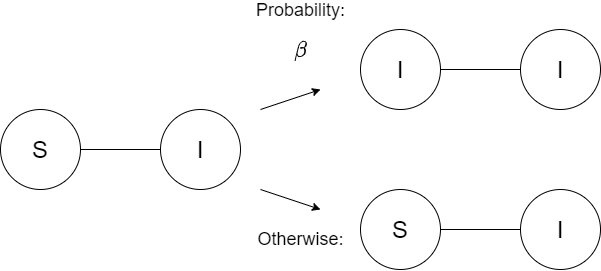

A susceptible edge can only be infected once, and is only at risk of being infected by nodes that were infected (**I**) at the *start* of each iteration: newly infected nodes don't pass the infection onwards until the next time step.

** Step 2: ** Next, consider all infected (**I**) **vertices** that were infected at the *start* of the time step - prior to step 1 - and consider them recovered **R** with probability $\gamma$.  This is depicted below in the SIR_Removal.png image.

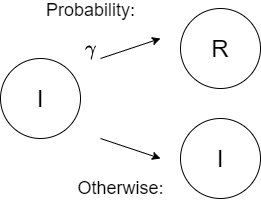

Think of this process as the probability of becoming well: not only are those ndoes no longer contagious, they also have developed antibodies that make them immune to re-infection!

The model can run for any number of time steps, but for reasonably small graphs we might expect to see the number of infections taper off to zero after a while.  If you watched any news coverage during the onset of COVID-19, one of the main tasks in predicting a pandemic is predicting the *basic reproduction number* $R_0= \frac{\beta}{\gamma}$ of the disease.  Since $\beta$ represents a rate of spread and $\gamma$ represents a rate of recovery, the ratio is important in determining whether a disease spreads faster than recovery can occur.

### Warmups

A couple of quick questions to make sure we're understanding the model and the roles of $\beta$ and $\gamma$.

Feel free to use office hours/piazza to ask more pointed questions about the Warmups **only** to make sure you understand the basics of the transition model before you approach the implementation section later.

**Part A**

Suppose we have the small system depicted at time $t=0$ below, in SIR_Warmup1.png.

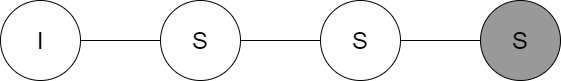

What is the exact probability that the last node on the right is an infected node **I** after exactly 3 time steps?  What is the exact probability that the leftmost node is still infected at this time?

Probably of each sequential node in each time step has independent probability of $\beta$, so the probability of the last node becoming infected over three time steps is $\beta^{3}$

**Part B**

Suppose we consider the alternative 4-vertex graph depicted below, in SIR_Warmup2.png.

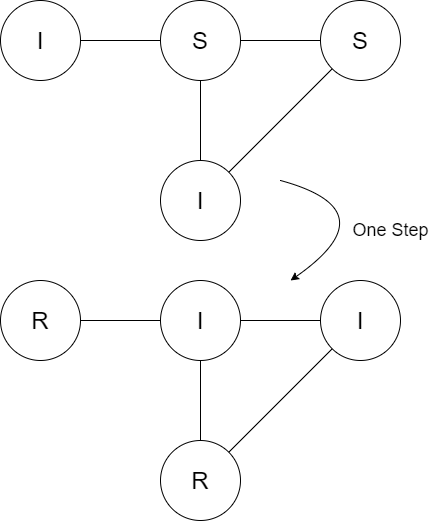

What is the exact probability that we transition from the graph on the top to the exact graph on the bottom in a single time step?  Note that the "center" **S** node with two infected neighbors should be more likely to end up infected than rightmost node.

probability of center **S** node turning to **I**: $\beta+\beta=2\beta$ 

probability of right **S** node turning to **I**: $\beta$ 

probability of bottom **I** node turning to **R**: $\gamma$

probability of left **I** node turning to **R**: $\gamma$

All these events are independent of eachother, so total probability = $2\beta*\beta*\gamma*\gamma = 2\beta^{2}*\gamma^{2}$

### Coding The Model

Enough with the exact pen-and-paper solutions!  Let's run this model.  Suppose we wish to implement the SIR model on the graph below (SIR_graph.png):

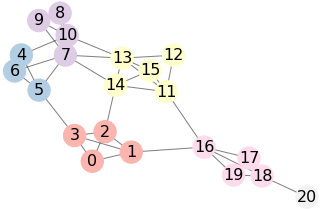

For your convenience, the two most common ways to represent this are listed below.  `edges` contains a list of each of the edges of the graph, and `neighbors` is a dictionary that contains the neighbors of each node (as a list of connected nodes).

`nodes` holds the 21 vertices, labelled by their indexes 0 through 20.
`neighbors` is a dictionary, where e.g. `neighbors[1]` holds the list of neighboring vertices to vertex #1.

In [8]:
#manual edge assignments
edges=[[0,1],[0,2],[0,3],[1,2],[1,3],[2,3],\
      [4,5],[4,6],[5,6],\
      [7,8],[7,9],[7,10],[8,9],[8,10],[9,10],\
      [11,12],[11,13],[11,14],[11,15],[12,13],[13,14],[14,15],\
      [16,17],[16,18],[16,19],[17,19],[18,19],[17,18],\
      [1,16],[2,14],[3,5],[5,7],[6,7],[4,10],[10,13],[7,13],[7,14],[13,15],[11,16],[18,20]]
#create a dictionary as option
nodes = list(range(21))
neighbors={key: [] for key in range(len(nodes))} 
for edge in edges:
    neighbors[edge[0]].append(edge[1])
    neighbors[edge[1]].append(edge[0])
    
#other useful variables
nodes = list(range(21))
N = len(nodes)
#Dictionary usage:
for node in neighbors:
    print('Node # ',node, ' has neighbors of ', neighbors[node])

Node #  0  has neighbors of  [1, 2, 3]
Node #  1  has neighbors of  [0, 2, 3, 16]
Node #  2  has neighbors of  [0, 1, 3, 14]
Node #  3  has neighbors of  [0, 1, 2, 5]
Node #  4  has neighbors of  [5, 6, 10]
Node #  5  has neighbors of  [4, 6, 3, 7]
Node #  6  has neighbors of  [4, 5, 7]
Node #  7  has neighbors of  [8, 9, 10, 5, 6, 13, 14]
Node #  8  has neighbors of  [7, 9, 10]
Node #  9  has neighbors of  [7, 8, 10]
Node #  10  has neighbors of  [7, 8, 9, 4, 13]
Node #  11  has neighbors of  [12, 13, 14, 15, 16]
Node #  12  has neighbors of  [11, 13]
Node #  13  has neighbors of  [11, 12, 14, 10, 7, 15]
Node #  14  has neighbors of  [11, 13, 15, 2, 7]
Node #  15  has neighbors of  [11, 14, 13]
Node #  16  has neighbors of  [17, 18, 19, 1, 11]
Node #  17  has neighbors of  [16, 19, 18]
Node #  18  has neighbors of  [16, 19, 17, 20]
Node #  19  has neighbors of  [16, 17, 18]
Node #  20  has neighbors of  [18]


**Part C:**

Implement a function **SIR_step(states, gamma, beta)** that takes one step of the SIR model with a known $\beta$ and $\gamma$ on the graph given above.

* **initial_state** should be a list/numpy array of length 21 of the state of each vertex, e.g. ['S','S','I','I','R','S',...,'I'].
* **gamma** is the constant determining recovery rate.
* **beta** is the constant determining transmission rate.

The return of the function should be the new states for each vertex, in the same format as **initial_state**.


In [9]:
import random

def SIR_step(initial_state, gamma, beta):
    states_I_neighbor_suspected = ['I','S']
    states_I_neighbor_recover = ['R','I']
    new_state = [None]*21
    visited_list = [None]*21
    for i in range(0,len(initial_state)):
        current_vertex_state = initial_state[i]
        count = 0
        for j in range(0,len(neighbors[i])):
            current_neighbor_indx = neighbors[i][j]
            visited = False
            for k in range(0,len(visited_list)):
                if(current_neighbor_indx == visited_list[k]):
                    visited = True
                    break
            if(visited == False):
                if(initial_state[current_neighbor_indx] == 'I'):
                    count += 1
        if(current_vertex_state == 'S'):
            prob = count*beta
            if(prob < 1):
                x = random.choices(states_I_neighbor_suspected,weights=(prob,1-prob),k=1)
                new_state[i] = x[0]
            else:
                new_state[i] = 'I'
        if(current_vertex_state == 'I'):
            y = random.choices(states_I_neighbor_recover,weights=(gamma,1-gamma),k=1)
            new_state[i] = y[0]
        if(current_vertex_state == 'R'):
            new_state[i] = current_vertex_state
        visited_list[i] = i
    return(new_state)

Run a couple of quick sanity checks and self-checks below:
 - what should happen if `states` contains no **I** nodes?
 - what should happen if `states` contains **I** nodes but $\beta=0$?


In [10]:
#Check your code is working for those trivial cases:
case_1 = [None]*21
for i in range(0,21):
    case_1[i] = 'S'

states = ['I','S']
case_2 = [None]*21
for i in range(0,21):
    case_2[i] = random.choice(states)

no_I_nodes = SIR_step(case_1,.3,.3)
print(no_I_nodes,'\n')

print(case_2)
beta_zero = SIR_step(case_2,.3,0)
print(beta_zero)

['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S'] 

['I', 'S', 'I', 'I', 'S', 'I', 'S', 'I', 'S', 'S', 'I', 'I', 'S', 'S', 'S', 'I', 'I', 'I', 'I', 'S', 'S']
['I', 'S', 'I', 'I', 'S', 'I', 'S', 'R', 'S', 'S', 'I', 'I', 'S', 'S', 'S', 'I', 'R', 'R', 'I', 'S', 'S']


**Part D:**

Time to run the model for an initial set of states and describe what happens!  Suppose the initial states of each of the nodes is such that nodes 7, 13, and 18 are infected and the rest are susceptible.  Code for this is given below.

Now we want to create a function or a loop that runs **SIR_step** for 500 time steps.  

At the end of 500 steps, we will return only a tuple of two integers.  First, the total number of nodes that were infected over the course of the epidemic; and second, and the total days spent infected across all nodes.  These are two good measures of the severity of the epidemic!  When we take 500 steps, this represents *one* example of what could happen when an infection is set loose in a small (compartmental) environment.  As data scientists, we need to run this 500-step experiment multiple times to understand the overall descriptors of our simulated pandemic!

Implement a function **SIR_sim(intial_state, gamma, beta, n_steps)** that takes *many* step of the SIR model with a known $\beta$ and $\gamma$ on the graph given above.  It should return the tuple of **(days_lost,people_infected)**

* **initial_state** should be a list/numpy array of length 21 of the state of each vertex, e.g. ['S','S','I','I','R','S',...,'I'].
* **gamma** is the constant determining recovery rate.
* **beta** is the constant determining transmission rate.
* **n_steps** is the number of steps.  It can be defaulted as 500.
* The return **days_lost** is the number of cumulative days all people were infected.  After each call to **SIR_step**, you should increment this amount by the number of `I` entries in your state vector.
* The return **people_infected** is the number of people that were infected into state `I` at any point in the simulation.


In [11]:
#given initialization; 'states' has 18 'S' nodes and 3 'I' nodes
states=np.array(['S']*21)
infected_states=[7,12,18]
for idx in infected_states:
    states[idx]='I'

def SIR_sim(gamma, beta, initial_state=states, n_steps=500):
    days_lost = 0
    people_infected = 0
    i_state = initial_state
    for i in range(0,n_steps):
        current_state = SIR_step(i_state,gamma,beta)
        for j in range(0,21):
            if(initial_state[j] == 'I' and current_state[j] == 'I'):
                days_lost += 1
            if(initial_state[j] == 'S' and current_state[j] == 'I'):
                people_infected += 1
        i_state = current_state
    return days_lost,people_infected

**Part E:**

Run your function in part D 100 times (so you'll have 100 instances of 500 time steps) *each* for 3 different sets of values of the constants $\gamma$ and $\beta$.  The three sets of conditions we should run experiments under are:

* First, when the values of $\gamma$ and $\beta$ are each 0.05.
* Second, when $\beta=0.04$ and $\gamma=0.06$.
* Finally, when $\beta=0.06$ and $\gamma=0.04$.

For each one of those 3 sets of experiments, report the average number of people infected and average number of days lost to infection.

In [13]:
#first simulation
sim_results_1 = [[0,0]]*100
for i in range(0,100):
    sim_results_1[i] = SIR_sim(0.05,0.05)

sim_results_1 = np.asarray(sim_results_1)
mean_days_lost_1 = np.mean(sim_results_1,axis=1)[0] 
mean_people_infected_1 = np.mean(sim_results_1,axis=1)[1] 

#second simulation
sim_results_2 = [[0,0]]*100
for i in range(0,100):
    sim_results_2[i] = SIR_sim(0.06,0.04)

sim_results_2 = np.asarray(sim_results_2)
mean_days_lost_2 = np.mean(sim_results_2,axis=1)[0] 
mean_people_infected_2 = np.mean(sim_results_2,axis=1)[1] 

#third simulation
sim_results_3 = [[0,0]]*100
for i in range(0,100):
    sim_results_3[i] = SIR_sim(0.04,0.06)

sim_results_3 = np.asarray(sim_results_3)
mean_days_lost_3 = np.mean(sim_results_3,axis=1)[0] 
mean_people_infected_3 = np.mean(sim_results_3,axis=1)[1] 


#recommended output style:
# print('For beta=',beta,' and gamma=',gamma,' lost', days_lost  ,' days between ', people_infected, ' people')
print('For beta=',0.05,' and gamma=',0.05,' lost', mean_days_lost_1 ,' days between ', mean_people_infected_1, ' people')
print('For beta=',0.04,' and gamma=',0.06,' lost', mean_days_lost_2 ,' days between ', mean_people_infected_2, ' people')
print('For beta=',0.06,' and gamma=',0.04,' lost', mean_days_lost_3 ,' days between ', mean_people_infected_3, ' people')

For beta= 0.05  and gamma= 0.05  lost 77.0  days between  10.0  people
For beta= 0.04  and gamma= 0.06  lost 55.0  days between  44.5  people
For beta= 0.06  and gamma= 0.04  lost 18.5  days between  103.0  people


** Part F: **

You should have observed that $\beta=0.06$ and $\gamma=0.04$ was the "more dangerous" variant of the infection, with an $$R_0=\frac{\beta}{\gamma}$$ of 1.5.  We're going to explore the concept of *social distancing*, which public health authorities suggest includes attempting to limit cross-household exposure to contagion.  Scroll up and take a look at the manual edge assignments code from part **B**: pay attention to the line breaks.  This synthetic data is meant to represent 5 close-knit units/families: [0-3], [4-6],[7-10],[11-15],[16-19] and then a collection of edges between those units in the last line.  The goal of social distancing is to remove as many of the between-unit edges from the graph as possible.

Suppose that under social distancing, each inter-family edge is removed (independentally) with probability .5.

Recreate your code from parts **B**, **C**, **D**, and **E** and create a **SIR_sim_distanced** function to simulate 500 steps of an **SIR_step** function.  

Implement a function **SIR_sim(intial_state, gamma, beta, n_steps)** that takes *many* step of the SIR model with a known $\beta$ and $\gamma$.  It should return the tuple of **(days_lost,people_infected)**

* **initial_state** should be a list/numpy array of length 21 of the state of each vertex, e.g. ['S','S','I','I','R','S',...,'I'].
* **gamma** is the constant determining recovery rate.
* **beta** is the constant determining transmission rate.
* **n_steps** is the number of steps.  It can be defaulted as 500.
* The return **days_lost** is the number of cumulative days all people were infected.  After each call to **SIR_step**, you should increment this amount by the number of `I` entries in your state vector.
* The return **people_infected** is the number of people that were infected into state `I` at any point in the simulation.
* **Before** any **SIR_step** calls, evaluate each edge in the list of inter-family connections.  [[1,16],[2,14],[3,5],[5,7],[6,7],[4,10],[10,13],[7,13],[7,14],[13,15],[11,16],[18,20]] and *discard it* from the simulation with probability .5.  Use the resulting graph for your simulation.  Note that this may mean you need to input a graph $G$ into **SIR_step**, since each simulation may have different inter-unit edges removed.  Alternatively, you could redefine **SIR_step** inside your **SIR_sim** to account for the changes in the graph's edges.

Report the resulting average number of people infected and average number of days lost to infection under the $\beta=0.06$ and $\gamma=0.04$ parameter values.  Did this amount of social distancing seem to work?


In [14]:
#some setup for convenience
fam_edges=[[0,1],[0,2],[0,3],[1,2],[1,3],[2,3],\
      [4,5],[4,6],[5,6],\
      [7,8],[7,9],[7,10],[8,9],[8,10],[9,10],\
      [11,12],[11,13],[11,14],[11,15],[12,13],[13,14],[14,15],\
      [16,17],[16,18],[16,19],[17,19],[18,19],[17,18]]
interfam_edges=[[1,16],[2,14],[3,5],[5,7],[6,7],[4,10],[10,13],[7,13],[7,14],[13,15],[11,16],[18,20]]

def remove_edges(edge_list):
      delete_idx = []
      counter = 0
      bools = [0,1]
      for i in range(0,len(edge_list)):
            for j in range(0,len(interfam_edges)):
                  if(edge_list[i] == interfam_edges[j]):
                        x = random.choice(bools)
                        if(x == 1):
                              delete_idx.append(i)
                              counter += 1
                        break
      edge_l = np.asarray(edge_list)
      edges_distanced = np.delete(edge_l,delete_idx,0)
      return edges_distanced

edges_distanced = remove_edges(edges)
#print(edges_distanced)
nodes = list(range(21))
neighbors_distanced = {key: [] for key in range(len(nodes))} 
for edge in edges_distanced:
    neighbors_distanced[edge[0]].append(edge[1])
    neighbors_distanced[edge[1]].append(edge[0])

def SIR_step_distanced(initial_state, gamma, beta):
    states_I_neighbor_suspected = ['I','S']
    states_I_neighbor_recover = ['R','I']
    new_state = [None]*21
    visited_list = [None]*21
    for i in range(0,len(initial_state)):
        current_vertex_state = initial_state[i]
        count = 0
        for j in range(0,len(neighbors_distanced[i])):
            current_neighbor_indx = neighbors_distanced[i][j]
            visited = False
            for k in range(0,len(visited_list)):
                if(current_neighbor_indx == visited_list[k]):
                    visited = True
                    break
            if(visited == False):
                if(initial_state[current_neighbor_indx] == 'I'):
                    count += 1
        if(current_vertex_state == 'S'):
            prob = count*beta
            if(prob < 1):
                x = random.choices(states_I_neighbor_suspected,weights=(prob,1-prob),k=1)
                new_state[i] = x[0]
            else:
                new_state[i] = 'I'
        if(current_vertex_state == 'I'):
            y = random.choices(states_I_neighbor_recover,weights=(gamma,1-gamma),k=1)
            new_state[i] = y[0]
        if(current_vertex_state == 'R'):
            new_state[i] = current_vertex_state
        visited_list[i] = i
    return(new_state)

def SIR_sim_distanced(gamma, beta, initial_state=states, n_steps=500):
    days_lost = 0
    people_infected = 0
    i_state = initial_state
    for i in range(0,n_steps):
        current_state = SIR_step_distanced(i_state,gamma,beta)
        for j in range(0,21):
            if(initial_state[j] == 'I' and current_state[j] == 'I'):
                days_lost += 1
            if(initial_state[j] == 'S' and current_state[j] == 'I'):
                people_infected += 1
        i_state = current_state
    return days_lost,people_infected

sim_results_3_distanced = [[0,0]]*100
for i in range(0,100):
    sim_results_3_distanced[i] = SIR_sim_distanced(0.04,0.06)

sim_results_3_distanced = np.asarray(sim_results_3_distanced)
mean_days_lost_3_distanced = np.mean(sim_results_3_distanced,axis=1)[0] 
mean_people_infected_3_distanced = np.mean(sim_results_3_distanced,axis=1)[1] 
print('For beta=',0.06,' and gamma=',0.04,' lost', mean_days_lost_3_distanced ,' days between ', mean_people_infected_3_distanced, ' people')
#now re-run things with less edges!

For beta= 0.06  and gamma= 0.04  lost 49.0  days between  62.5  people


**Part G: **

Comment on anything you found interesting or unusual.

While the number of people infected decreased for the distanced graph, the number of days lost increased.

Computational epidemiology is a huge field, and models can add all kinds of added components: nodes could be surfaces *or* people, graphs could be representing cities or communities instead of individuals, etc.  One similar model is used instead for diseases that don't ever have **R** states: nodes just transition from **I** to **S** because there may be no long-term immunity after infection.

If you're ever interested in learning more about computational epidemiology, CU-Boulder has a couple of world experts in network-based epidemology and computational public health.  Check out the CS department's course offerings by Aaron Clauset, Dan Larremore, and others for great opportunities to do these sorts of things in a more advanced setting.

<br>

---
[Back to top](#top)
<a id='bot'></a>

### Appendix: Graph plotting code

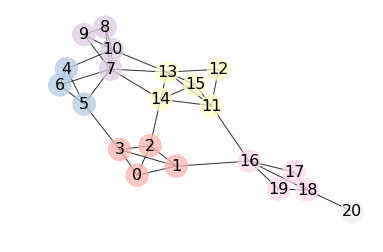

In [13]:
#here's the code to generate the given plot.  It is not needed for any of your tasks,
#...but if you're interested in including some visualizations in your analysis in parts F/G you can
#create the graph in networkx
import networkx as nx

G=nx.Graph()
nodes=[i for i in range(21)]
G.add_nodes_from(nodes)
for i in range(len(edges)):
    G.add_edge(edges[i][0],edges[i][1])

#plot the graph
np.random.seed(6) #graph plotting algorithm is random; this ensures same image each time
pos = nx.spring_layout(G) #algorithm that tries to "cluster" node plot locations
colors=[0,0,0,0,1,1,1,2,2,2,2,3,3,3,3,3,4,4,4,4,5] #manual "family" groupings
labels=dict(zip(range(21),range(21))); #label 0-20
nx.draw_networkx_nodes(G, pos, node_color=colors, cmap='Pastel1', node_size=500, alpha=.75); #node colors easy to see labels over
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.8); #draw edges
nx.draw_networkx_labels(G, pos, labels, font_size=16); #label vertices by index/number
plt.axis("off");


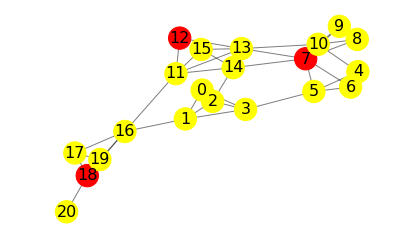

In [14]:
#replace "S" with yellow, "R" with green, "I" with red for a quick "who is at risk?" type image.
state_colors=['red' if x == 'I' else 'yellow' if x=='S' else 'green' for x in states]
pos = nx.spring_layout(G) #algorithm that tries to "cluster" node plot locations

nx.draw_networkx_nodes(G, pos, node_color=state_colors, node_size=500);
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5);
nx.draw_networkx_labels(G, pos, labels, font_size=16);
plt.axis("off");